## Evaluation metrics for Classification

*Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are*

### 4.1 Accuracy score

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.columns = data.columns.str.lower().str.replace(' ','_')

categorical_cols = list(data.dtypes[data.dtypes == 'object'].index)
for c in categorical_cols:
    data[c] = data[c].str.lower().str.replace(' ','_')

data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce')
data['totalcharges'] = data['totalcharges'].fillna(0)

data['churn'] = (data['churn'] == 'yes').astype(int)

data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [5]:
df_full_train, df_test = train_test_split(data,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

del df_train['churn']
del df_val['churn']
del df_test['churn']

categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 
                    'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup',
                    'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 
                    'contract', 'paperlessbilling','paymentmethod']

numerical_cols = ['tenure','monthlycharges','totalcharges']

use_features = categorical_cols + numerical_cols

dv=DictVectorizer(sparse=False)

dict_train = df_train[use_features].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val[use_features].to_dict(orient='records')
X_val = dv.transform(dict_val)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)

(y_val == churn_decision).mean()

0.8034066713981547

### 4.2 Precision and Recall of dummy model


Let us take a dummy model, where we do not do any actual predictions, but take all output as ones or take all output as zeros (the possible output value can be 0 or 1) and see what the accuracy score will be for these dummy models

In [6]:
y_zeros = np.zeros(len(y_val))

In [7]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [19]:
predicted_positive = (y_zeros == 1)
predicted_negative = (y_zeros == 0)

In [20]:
tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

Confusion Matrix:

         tn  |  fp
         _________
         fn  |  tp

In [21]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[1023,    0],
       [ 386,    0]])

In [22]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.73, 0.  ],
       [0.27, 0.  ]])

#### 1 Precision and Recall for dummy mode

In [23]:
precision = tp / (tp + fp)
precision

<ipython-input-23-14cf9d9238e4>:1: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


nan

In [24]:
#Recall = looks at actual positives. fraction of correctly identified positives = tp / actual positives
recall = tp / (tp + fn)
recall

0.0

#### 2 F1 score

f1 = 2.P.R/(P+R)

In [25]:
f1 = 2*precision*recall/(precision+recall)
f1

nan

In [32]:
#Using the predictions on genuine model
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [33]:
tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

In [34]:
precision = tp / (tp + fp)
precision

0.6752411575562701

In [35]:
recall = tp / (tp + fn)
recall

0.5440414507772021

In [36]:
f1 = 2*precision*recall/(precision+recall)
f1

0.6025824964131995

In [37]:
thresholds = np.linspace(0,1,101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (predicted_positive & actual_negative).sum()
    fn = (predicted_negative & actual_positive).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*precision*recall/(precision+recall)
    
#     tpr = tp / (tp + fn)
#     fpr = fp / (fp + tn)
    
    scores.append((t, tp, fp, fn, tn, precision, recall, f1))

<ipython-input-37-8cc88ab28541>:16: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [38]:
columns = ['threshold','tp','fp','fn','tn', 'precision', 'recall', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [39]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.0,386,1023,0,0,0.273953,1.000000,0.430084
10,0.1,366,556,20,467,0.396963,0.948187,0.559633
20,0.2,333,356,53,667,0.483309,0.862694,0.619535
30,0.3,284,236,102,787,0.546154,0.735751,0.626932
40,0.4,249,166,137,857,0.600000,0.645078,0.621723
50,0.5,210,101,176,922,0.675241,0.544041,0.602582
60,0.6,150,53,236,970,0.738916,0.388601,0.509338
70,0.7,76,20,310,1003,0.791667,0.196891,0.315353
80,0.8,13,1,373,1022,0.928571,0.033679,0.065000
90,0.9,0,0,386,1023,NaN,0.000000,NaN


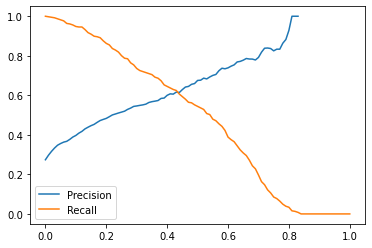

In [40]:
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall')
plt.legend()

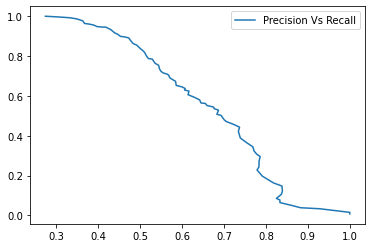

In [41]:
plt.plot(df_scores['precision'], df_scores['recall'], label='Precision Vs Recall')
plt.legend()

Since tp and fp are 0 beyond a certain threshold, precision calculation turns out to be a NaN. Since precision converges to 1 beyond that certain threshold, filling all NaNs with 1 for precision to see the graphs and auc.

In [45]:
df_scores['precision'].isnull().sum()

17

In [46]:
df_scores['precision'] = df_scores['precision'].fillna(1)

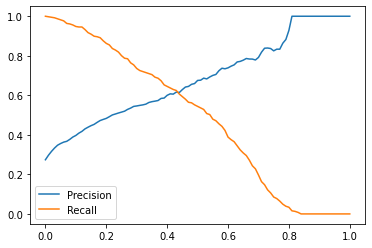

In [49]:
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall')
plt.legend()

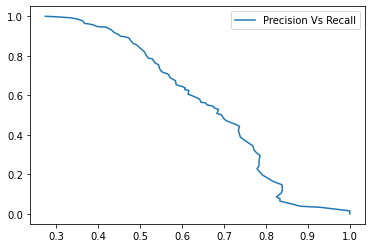

In [50]:
plt.plot(df_scores['precision'], df_scores['recall'], label='Precision Vs Recall')
plt.legend()

#### Getting errors when trying to calculate AUC of precision and recall for different thresholds. 

Awaiting further guidance in order to proceed.

In [54]:
from sklearn.metrics import auc, roc_auc_score

auc_score = auc(df_scores['precision'],df_scores['recall'])
auc_score

ValueError: x is neither increasing nor decreasing : [0.27395316 0.29683886 0.31630972 0.33333333 0.34762774 0.35620301
 0.36319846 0.36722606 0.37703252 0.38883035 0.39696312 0.4087346
 0.41762014 0.43010753 0.43866171 0.44656489 0.45300261 0.46318608
 0.47252747 0.47807638 0.48330914 0.49180328 0.50077519 0.50552923
 0.51050081 0.515      0.51965812 0.52879581 0.5353902  0.54392523
 0.54615385 0.54901961 0.5515873  0.55533199 0.56378601 0.56784969
 0.57051282 0.57359307 0.58426966 0.58604651 0.6        0.60740741
 0.60598504 0.61636829 0.61417323 0.62912088 0.64183381 0.64497041
 0.65558912 0.65944272 0.67524116 0.67647059 0.68686869 0.68292683
 0.69285714 0.70075758 0.70542636 0.72427984 0.73706897 0.73423423
 0.73891626 0.74742268 0.7540107  0.76878613 0.77160494 0.77777778
 0.7862069  0.78358209 0.78333333 0.77876106 0.79166667 0.81818182
 0.83823529 0.83928571 0.83673469 0.825      0.83333333 0.83333333
 0.86363636 0.88235294 0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ].

In [55]:
calc_roc_auc_score = roc_auc_score(df_scores['precision'],df_scores['recall'])
calc_roc_auc_score

ValueError: continuous format is not supported